# Intro to Machine Learning 
Brady Bogda

Dec 2021

# Uses Ames Housing Dataset as part of Kaggle Competition
**Kaggle Competition - House Prices:** https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

---



# **Introduction:** What is Machine Learning


> Machine learning is a process of building a program that has the ability to "learn" without being explcity programmed. An iterative approach allows the program to optimize specific parameters by running through training data, such that it will be able make insights on new data (data not part of the training set)

>Machine learning can be used to solve many types of problems including supervised and unsupervised tasks. In a supervised tasks, the training data you feed the algorithm inlcudes the desired solutions, called labels. The model will learn how to predict these labels or target values.
>> In supervised classification the program gets instances (instance is one piece of data) and predicts a class or the group that it belongs to, such as classifying an email as spam. Supervised regression predicts a number or value for each instance. In this guide I'll walk you through a regressions model that predicts housing prices based on various fields. 

> An unsupervised task in contrast does not receive the desired outputs when training. Common unsupervised tasks include:
>> Clustering, where the model puts instances into groups; anomaly and novelty detection, where the model predicts whether an instance belongs into a group; and dimensionality reductions, a method of simplifying datasets to better train other models.

# **Importing the Data:**

> After the problem has been identified, the first step to building a machine learning model is aquiring the data. A portion of the data will go towards training the model (the training set), and another portion will go towards evaluating the model after it‘s been trained (called the test set). It's important to keep these separated. If you test the model on data that was used to train the model you may receive an unrealistic estimate of how well the model performs. We want to know how well our model generalizes, and not how well it does on our subset of data. 

> This dataset was a part of a Kaggle Competition, so you can either download it using the kaggle api or from the link at the top of the page. You'll need an access key from your account (find in settings)

#### `Linking Kaggle Account`

In [1]:
!mkdir ~/.kaggle

In [ ]:
!echo '{"username": "<username>","key":"<access_key>"}' > /root/.kaggle/kaggle.json

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

#### `Downloading Data`

In [4]:
!kaggle competitions download house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 29.9MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.8MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.8MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 69.3MB/s]


In [5]:
#importing libraries for project 

import pandas as pd #imports pandas, a python library for data analysis and manipulation
import numpy as np #imports numpy, a library for managing large high dimensional arrays and matrices
import sklearn #imports scikit learn, a library with multiple machine learning models

In [ ]:
#using pandas, imports training and test dataset from a csv, to a pandas DataFrame
#note this test set does not included labels, you can upload you predictions to Kaggle to get the you model performance
# they hide this because the data is part of a competition

housing = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [ ]:
#separats the target output, the labels, from the training data
#good practice to ensure the labels are not used in training

prices = housing['SalePrice'] #copies label column to its own pandas series
features_full = housing.drop('SalePrice', axis=1) #drops the label column from the training data

#### `Exploring Data`

In [8]:
housing.head() #previewing data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
#previewing data to see columns (called features), number of missing values for each column, and each columns data type

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

[]

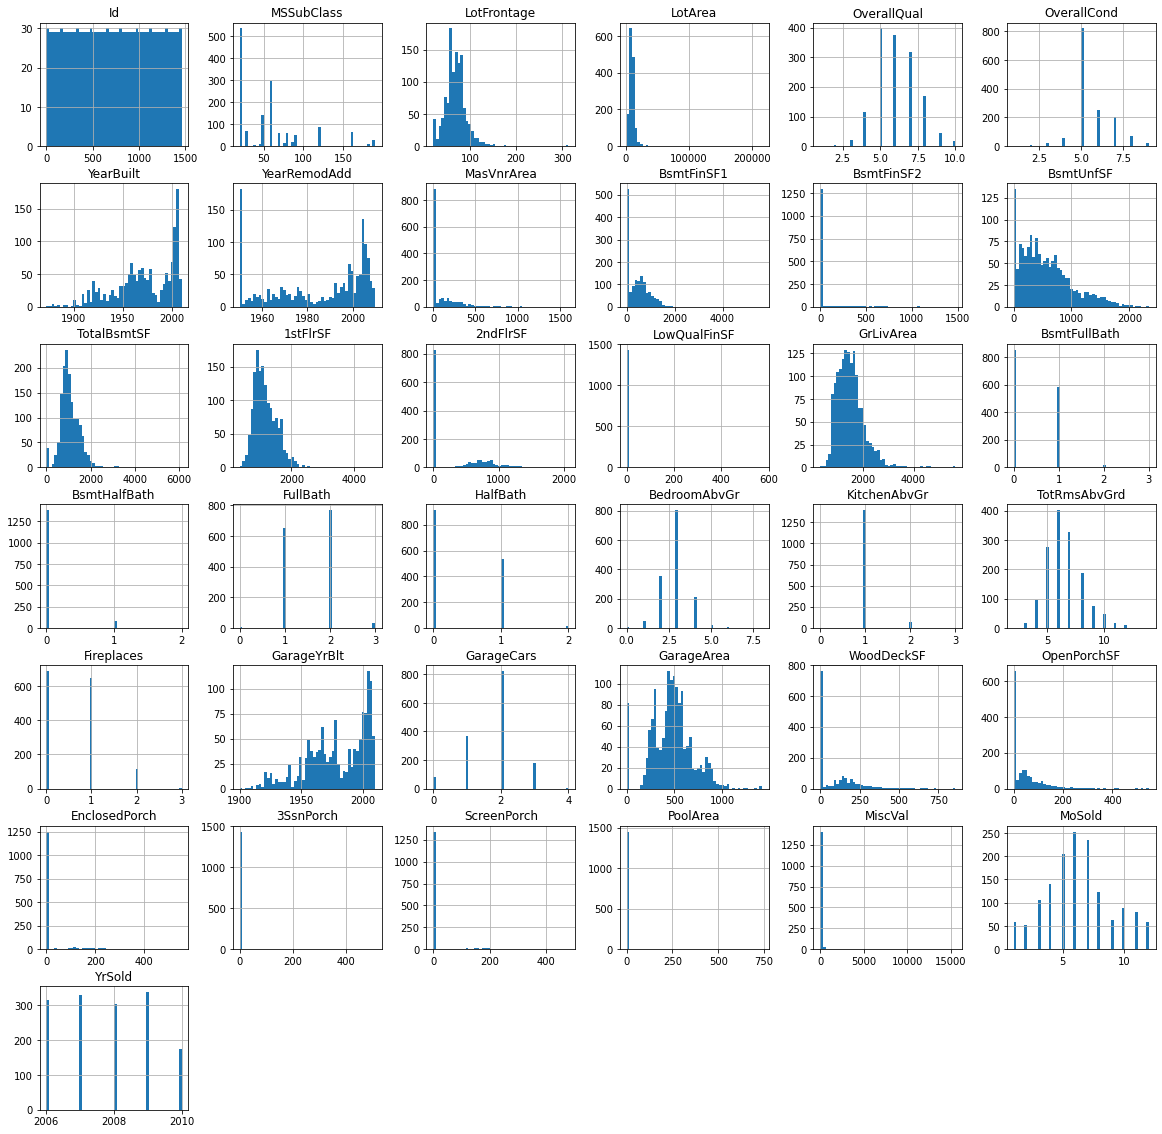

In [ ]:
import matplotlib.pyplot as plt #imports library for visualizing data

housing.hist(bins=50, figsize=(20,20)) #plots histograms for numerical features (columns in dataset)
plt.plot()

In [ ]:
#similar to housing.info, this identifies how many values for each feature is missing
#if a feature is missing too many values, it may need to be dropped.

null_col = housing.isna().sum()
print(null_col.to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
#creates correlation matrix and shows SalePrice (target value) column to see how each feature is correlated to SalePrice 

housing.corr()['SalePrice'].sort_values(ascending=False).reset_index()

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


In [ ]:
housing[['SalePrice', 'YearBuilt', 'YearRemodAdd']].sort_values(['YearBuilt', 'YearRemodAdd']).reset_index()

,index,SalePrice,YearBuilt,YearRemodAdd
0,1349,122000,1872,1987
1,1137,94000,1875,1996
2,1132,117500,1880,1950
3,630,124000,1880,1991
4,304,295000,1880,2002
...,...,...,...,...
1455,157,269500,2009,2010
1456,819,224000,2009,2010
1457,898,611657,2009,2010
1458,987,395192,2009,2010


`This code helps understand the distribution of features across feature values`





In [ ]:
#helps understand the distribution of features across feature values
#in this scenario all instances have value 'AllPub' for the utiliites feature except 1 instance
#constant data like this will not be helpful in differentiating/predicting target prices
#utilities can be switched out to view other variablea

housing.groupby('Utilities')['Utilities'].count() #drop this variable below

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
#does same thing as code above, to see distribution

slope_counts = housing['LandSlope'].value_counts()
slope_counts

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [ ]:
housing['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

`In the distribution of pool areas above, a large majority have pool area 0 (meaning they don’t have a pool). Sometimes it may be more effiecent to convert this variable to a binary feature, such as ‘has_pool’. If the pool area is greater than 0, set the value as 1 to indicate true, other set the value as 0 to indicate they do not have a pool. This modifying of features to help the model is called feature engineering `

### **Feature Engineering**

In [10]:
#imports libraries that will help build custom transformers
#these help automate the process of modifying data, with the goal of maximizing the efficiency of the model
from sklearn.base import TransformerMixin, BaseEstimator

##### Feature Transformer 1
*not used in final model*

In [ ]:
class FeatureSelector(BaseEstimator, TransformerMixin):
  def __init__(self, n_pos=3, n_neg=1):   #add a boolean parameter to include categorical attributes
    self.n_pos = n_pos
    self.n_neg = n_neg
  
  def create_corr(self, x, y):
    data = x.copy()
    data['target'] = y.copy()
    corr_mat = data.corr()
    return corr_mat['target'].sort_values(ascending=False).reset_index()
  
  def num_features(self, corr):
    if(self.n_pos + self.n_neg + 2 >= len(corr)):
      features = corr.iloc[1:len(corr)]['index'].tolist()
    else:
      pos_feat = corr.iloc[1:self.n_pos+1]['index'].tolist()
      neg_feat = corr.iloc[-self.n_neg:]['index'].tolist()
      features = pos_feat + neg_feat
    return features

  def fit(self, X, y):
    corr_matrix = self.create_corr(X, y)
    self.features = self.num_features(corr_matrix)
    return self

  def transform(self, X):
    return X[self.features]

##### Feature Transformer 2

*not used in final model*


In [ ]:
class FeatureSelector2(BaseEstimator, TransformerMixin):
  def __init__(self, n_pos=3, n_neg=1):   #add a boolean parameter to include categorical attributes
    self.n_pos = n_pos
    self.n_neg = n_neg
    self.corr_matrix = []
    self.features = []
    self.y = []
  def fit(self, X, y):
    self.y = y.copy() 
    return self
  def transform(self, X):
    data = X.copy()
    data['target'] = self.y
    corr_mat = data.corr()
    self.corr_matrix = corr_mat['target'].sort_values(ascending=False).reset_index()
    if(self.n_pos + self.n_neg + 2 >= len(corr_mat)):
      self.features = self.corr_matrix.iloc[1:len(self.corr_matrix)]['index'].tolist()
    else:
      #selects the most positively and negatively correlated features to run model
      self.pos_feat = self.corr_matrix.iloc[1:self.n_pos+1]['index'].tolist()
      self.neg_feat = self.corr_matrix.iloc[-self.n_neg:]['index'].tolist()
      self.features = self.pos_feat + self.neg_feat
    print(self.features)     #remove line
    while True:
      try:
        self.features.remove('target')
      except ValueError:
        break
    return X[self.features]

##### Feature Grab:
`This class takes an array of feature names to use in the model or an array of feature to drop from the model` 

In [11]:
class feature_grab(BaseEstimator, TransformerMixin):
  def __init__(self, feature_cols, drop=False):
    self.feature_cols = feature_cols
    self.drop = drop

  def fit(self, x, y=None):
    return self

  #returns dataframe of selected columns or drop columns
  def transform(self, x, y=None):
    if not self.drop:
      return x[self.feature_cols]
    else:
      return x.drop(self.feature_cols, axis=1, errors='ignore')

##### Numerical Transformer:
`This class does the feature engineering for numerical features. It helps reduce the number of features to the features that are the most valuable for predicting housing prices. For example, instead of having two features, number of full baths and number of half baths, this class will combine those into one feature, number of baths. `

In [12]:
class num_transformer(BaseEstimator, TransformerMixin): #calls two class bases to set up class
  def __init__(self, feat_eng=True): #sets up the class constructor with one parameter 
    self.feat_eng = feat_eng
  
  def fit(self, x, y=None):
    return self

  def transform(self, x, y=None):
    if self.feat_eng: 
      data = x.copy()
      
      #each line creates a new feature, and sets it equal to a calculation of two or more current features  
        
      data['YearBtwnRemod'] = data['YearRemodAdd'] - data['YearBuilt'] 
      data['PropertyAge'] = data['YrSold'] - data['YearBuilt']
      data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']
      data['NewScore'] = data['YearBuilt'] + data['YearRemodAdd']

      data['BusyMonth'] = data['MoSold'].apply(lambda x: 1 if x in [3,4,5,6,7,8] else 0)

      data['TotalSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF']

      data['TotalBath'] = data['FullBath'] + (.5 * data['HalfBath']) + data['BsmtFullBath'] + (.5 * data['BsmtHalfBath'])   

      data['TotalPorchSF'] = data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF']

      data['TotalQual'] = data['OverallQual'] + data['OverallCond']
      data['TotalQualAvg'] = (data['OverallQual'] + data['OverallCond']) / 2

      data['SFPerRoom'] = data['GrLivArea'] / (data['TotRmsAbvGrd'] + data['FullBath'] + data['HalfBath'] + data['KitchenAbvGr'])               
      return data #returns new data to model
    else:
      return x  #retunrs original data if parameter speciifes to not use feature engineering



##### Categorical Transformer

In [13]:
class cat_transformer(BaseEstimator, TransformerMixin):
  def __init__(self, feature_eng=True):
    self.feature_eng = feature_eng

  def fit(self, x, y=None):
    return self
  
  def transform(self, x, y=None):
    #adds a feature of the time between built and remodel, drops remodel year col
    if self.feature_eng:
      #x.loc[:,'YearBtwnRemod'] = x['YearRemodAdd'] -x['YearBuilt']
      #return x.drop(['YearRemodAdd'], axis=1)
      data = x.copy()

      data['Fence'].fillna('NA')

      return data
    else:
      return x

    

### **Creating Pipelines:**
>To train a machine learning model you have to send data through the algorithm. However, multiple steps occur before this, and more often are the more time consuming stpes. For example, data may go through a standardizer to help scale the data, or go through a class to correct missing values. When steps like this are used, they must be applied to each stage of learning, including training and testing. If training data is prepared one way, and testing data is prepared another way, the model will not know how to predict values for the different testing data, and it will give poor results. In order to automate these preprocessing steps for each stage of learning, a pipeline is created. A pipeline, supported by the scikit learn library, connects multiple steps together so that data can be sent through all the steps with one call.

In [14]:
#importing libraries for preprocessing steps and building the pipeline

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

##### Columns to drop: old version

In [ ]:
housing['MSSubClass'] = housing['MSSubClass'].map(str)  # want to treat attribute as categorical variable

num_cols = [col for col in housing.columns if housing[col].dtype in ['float64', 'int']]
cat_cols = [col for col in housing.columns if housing[col].dtype == 'object']

#features with too many null value, to drop
num_drop_cols = [col for col in housing.columns if housing[col].isna().sum() > 350 and housing[col].dtype in ['float64', 'int64']]
cat_drop_cols = [col for col in housing.columns if housing[col].isna().sum() > 350 and housing[col].dtype == 'object']

#features with few unique values, to drop
num_drop_counts = [col for col in housing.columns for count in housing[col].value_counts() if housing[col].dtype in ['float64', 'int64'] and count > 1400]
cat_drop_counts = [col for col in housing.columns for count in housing[col].value_counts() if housing[col].dtype == 'object' and count > 1400]

num_drop_cols += num_drop_counts  #all numerical features to drop
cat_drop_cols += cat_drop_counts  #all categorical features to drop

##### Columns to drop

In [15]:
housing['MSSubClass'] = housing['MSSubClass'].map(str)  # want to treat attribute as categorical variable

#grabs numerical and categorical features respectively into arrays
num_cols = [col for col in housing.columns if housing[col].dtype in ['float64', 'int']]
cat_cols = [col for col in housing.columns if housing[col].dtype == 'object']

#adds features with too many null value to an array, so they can be dropped later
num_drop_cols = [col for col in num_cols if housing[col].isna().sum() > 350]
cat_drop_cols = [col for col in cat_cols if housing[col].isna().sum() > 350]

#adds features that have little variation to an array, so they can be dropped later
num_drop_counts = [col for col in num_cols for count in housing[col].value_counts() if count > 1400]
cat_drop_counts = [col for col in cat_cols for count in housing[col].value_counts() if count > 1400]

num_drop_cols += num_drop_counts  #adds arrays to get all numerical features to drop
cat_drop_cols += cat_drop_counts  #adds arrays to get all categorical features to drop


In [16]:
num_drop_cols #just printing array to see which columns (features) will be dropped

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']

In [17]:
cat_drop_cols

['Alley',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating']

In [18]:
#imports two different machine learing models 

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

##### Final Pipeline 

In [19]:
#this is the pipeline for the numerical features
#it links together the multiple preprocessing steps
num_pipe = Pipeline([
                     ('num_transform', num_transformer(feat_eng=True)), #custom transformer that adds new numerical features
                     ('grabber', feature_grab((num_drop_cols + cat_cols), drop=True)), #drops the list of bad features
                     ('imputer', SimpleImputer(strategy='median')), #fills in median of column for any missing values
                     ('scaler', StandardScaler()), #scales the data 
])

In [20]:
#this is the same pipeline, but adapting for categorical features
cat_pipe = Pipeline([
                     ('cat_transform', cat_transformer(feature_eng=True)),
                     ('grabber', feature_grab((cat_drop_cols + num_cols), drop=True)),
                     ('imputer', SimpleImputer(strategy='most_frequent')),
                     ('onehot', OneHotEncoder(handle_unknown='ignore')), #this steps converts categorical features to
                                                                         #numerical so that it can be used in a model
])


In [21]:
#this pipeline combines the numerical and categorical pipelines
prep_pipeline = FeatureUnion([
                              ('num_pipe', num_pipe),
                              ('cat_pipe', cat_pipe),
])

### **Building the model:**
>At this stage, the preprocessing pipeline complete and must be added to the model. I'll show two different models, a Gradient Boosting Regressor and a Random Forest Regressor. 

In [22]:
#the preprocessing pipeline is added, then the model is added.
model_forest = Pipeline([
                  ('prep', prep_pipeline),
                  ('model', RandomForestRegressor(random_state=22)) #random state sets the random number seed
])

In [23]:
model_XGB = Pipeline([
                      ('prep', prep_pipeline),
                      ('model', GradientBoostingRegressor())
])

##### Test Pipeline: Limited features

In [ ]:
engineered_feats = ['YearBtwnRemod','PropertyAge','RemodAge','NewScore','BusyMonth','TotalSF','TotalBath','TotalPorchSF','TotalQual','TotalQualAvg','SFPerRoom']

miny_model_XGB = Pipeline([
                           ('num_transform', num_transformer()),
                           ('grabber', feature_grab(engineered_feats)),
                           ('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler()),
                           ('model', GradientBoostingRegressor()),
])

##### Other Pipelines

In [ ]:
num_pipe1 = Pipeline([
                     ('imputer', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler()),
])

In [ ]:
model1 = Pipeline([
                  ('select', FeatureSelector()),
                  ('num', num_pipe1),
                  ('model', RandomForestRegressor())
])

### **Hyperparameter Tuning:**
>Machine learning models have many parameters that dictate how it performs. In many instances, there is no good way to determine the optimized values, so trial and error is often used. A grid search takes in list of many hyperparameter and possible values, and then trains models with different combinations of these values on small batches of data. The model scores the different combinations, and at the end returns the best set of parameter that minimizes the given statistic for error.

In [24]:
#imports the class for complete a Grid Search 
from sklearn.model_selection import GridSearchCV

In [25]:
#creates a list of different parameters and their possible values, to be passed to the GridSearch
forest_params = [
                 {'model__n_estimators': [80, 100, 150, 200]}
]

In [26]:
#creates the GridSearch object that will be called later
#passed parameter of model, list of parameter, a scoring statistic, and additional tuning parameters 
forest_search_model = GridSearchCV(model_forest, forest_params, cv=5, scoring='neg_mean_squared_log_error', refit=True)

In [27]:
#runs the GridSearch with the housing data and price data.
forest_search_model.fit(features_full, prices) #default n_esitmators=100 best

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('num_pipe',
                                                                        Pipeline(memory=None,
                                                                                 steps=[('num_transform',
                                                                                         num_transformer(feat_eng=True)),
                                                                                        ('grabber',
                                                                                         feature_grab(drop=True,
                                                                                                      feature_cols=['LowQualFinSF',
                                                      

In [28]:
forest_search_model.best_params_ #prints best parameters from search

{'model__n_estimators': 150}

In [29]:
forest_params2 = [
                 {'model__n_estimators': [100, 110]}
]

In [ ]:
forest_search_model2 = GridSearchCV(model_forest, forest_params2, cv=5, scoring='neg_mean_squared_log_error', refit=True)
forest_search_model2.fit(features_full, prices) #default n_esitmators=100 best

##### Grid Search for simplified model

In [ ]:
param_grid = [
              {'select__n_pos': [7, 8, 9, 10, 12], 'select__n_neg': [3, 4, 5, 6], 'model__n_estimators': [150, 200, 250]}
]

In [ ]:
grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)

In [ ]:
grid_search.fit(features_full, prices)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('select',
                                        FeatureSelector(n_neg=1, n_pos=3)),
                                       ('num',
                                        Pipeline(memory=None,
                                                 steps=[('imputer',
                                                         SimpleImputer(add_indicator=False,
                                                                       copy=True,
                                                                       fill_value=None,
                                                                       missing_values=nan,
                                                                       strategy='median',
                                                                       verbose=0)),
                                                        ('scaler',
                      

In [ ]:
grid_search.best_params_

{'model__n_estimators': 150, 'select__n_neg': 4, 'select__n_pos': 10}

In [ ]:
np.sqrt(-1*grid_search.best_score_)

31574.258305688454

##### Saving the model

In [ ]:
import joblib

In [ ]:
joblib.dump(grid_search.best_estimator_, 'house_price_model.pkl')

In [ ]:
model = joblib.load('house_price_model.pkl')

In [ ]:
forest_reg = Pipeline([
                       ('select', FeatureSelector(n_neg=4, n_pos=10)),
                       ('num', num_pipe),
                       ('model', RandomForestRegressor(n_estimators=150))
])

### **Scoring - validation:**
>Using metrics for scoring helps identify how the model is performing. The metric may measure the accuracy of a classification problem, the average error for a regression problem, or any other metric that may be suited for te problem. When working on machine learning problems, a test set is kept separate from the training data. A concern when training models is the potential to overfit training data, that is, learn patterns of the training data that doesn't generalize to the population of data. By keeping a test dataset separate, it can help score how the model generalizes to real world data.

In [31]:
#takes lists of neg_mean_squared_log_error scores and returns one mean_log_error score
def get_score(scores):
  return np.sqrt(-scores).mean()

In [32]:
#imports a class for performing cross validation scores
#splits data into folds, 5 for example, and then trains data on all but one fold and test data on that remaining fold.
#repeats process for the number of folds specified
from sklearn.model_selection import cross_val_score

In [33]:
#this performs a cross validation score, by passing the model, the data, the scoring metric, and the number of folds (cv)
scores_forest = cross_val_score(model_forest, features_full, prices, scoring='neg_mean_squared_log_error', cv=5)

In [34]:
#returns mean log error from random forest model with preprocessing pipeline
get_score(scores_forest)

0.14159116793889434

In [35]:
scores_XGB = cross_val_score(model_XGB, features_full, prices, scoring='neg_mean_squared_log_error', cv=5)

In [36]:
#score from gradient boosting model
get_score(scores_XGB)

0.12981787258446095

In [ ]:
scores_mini_XGB = cross_val_score(miny_model_XGB, features_full, prices, scoring='neg_mean_squared_log_error', cv=5)

In [ ]:
get_score(scores_mini_XGB)

#####S core version1

In [ ]:
sklearn.metrics.SCORERS

In [ ]:
scores = cross_val_score(forest_reg, features_full, prices, scoring='neg_mean_squared_log_error', cv=5)

In [ ]:
np.sqrt(-scores.mean())

0.1551813351038413

### **Scoring - test set:**
>Since this dataset is from a kaggle competition, they do not give the target values for the test set. Instead, the model predicts values for the test set, those values are submitted to kaggle, and kaggle returns a score metric by comparing the predicted values to the actual values.

In [38]:
#creates a dataframe with one column from the test set Id column
submission = pd.DataFrame(test['Id'])

In [39]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [40]:
submission.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [41]:
#trains the model on all the data, training and validation
model_XGB.fit(features_full, prices)

Pipeline(memory=None,
         steps=[('prep',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('num_pipe',
                                                 Pipeline(memory=None,
                                                          steps=[('num_transform',
                                                                  num_transformer(feat_eng=True)),
                                                                 ('grabber',
                                                                  feature_grab(drop=True,
                                                                               feature_cols=['LowQualFinSF',
                                                                                             '3SsnPorch',
                                                                                             'PoolArea',
                                                                                             'MiscVal',
     

In [42]:
#predicts values for the test data and adds column of those values to submission dataframe
submission['SalePrice'] = model_XGB.predict(test)

In [43]:
submission.head()

,Id,SalePrice
0,1461,125489.083410
1,1462,172723.048536
2,1463,167616.287979
3,1464,188443.181987
4,1465,191754.563292


In [44]:
#converts dataframe to proper csv format to submit to kaggle
submission[['Id', 'SalePrice']].to_csv('submission_1.csv', index=False)

In [ ]:
#submits final csv to kaggle competition
!kaggle competitions submit house-prices-advanced-regression-techniques -f submission_1.csv -m "Submit 1: XGB Regressor, Goolge Colab."

100% 33.6k/33.6k [00:00<00:00, 109kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

# **Final Score:** .13474
>All machine learning models follow similar steps, the data must be imported, it must be prepared someway for the model, and then the data needs to be fed through the model while monitoring the score, all in attempt to build a model that generalizes the best to real world data. That being said, the way that one goes about this varies from project to project and there really is no one way to do something. It takes experimentation to find the best preprocessing steps for the data, and then it takes experimentation to build the best model with the best hyperparameters. 

> Checkout Kaggle for different datasets and learning resources on different models

> And checkout the book Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron

**Best of Luck with your projects**

Feel free to reach out with questions